In [47]:
import pandas as pd
from fredapi import Fred
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.tseries.offsets import DateOffset
import datetime

In [2]:
with open(r"C:\Users\matthewsomma\Documents\US Home Sales Forecast\key.txt") as f:
   key = f.read()

fred = Fred(key)

In [3]:
NewComp = pd.DataFrame(fred.get_series('COMPUTNSA')).rename(columns={0:'NewComps'})
NewConst = pd.DataFrame(fred.get_series('UNDCONTNSA')).rename(columns={0:'NewConst'})
NewPerm = pd.DataFrame(fred.get_series('PERMITNSA')).rename(columns={0:'NewPerms'})
NewStart = pd.DataFrame(fred.get_series('HOUSTNSA')).rename(columns={0:'NewStarts'})
LumberPI = pd.DataFrame(fred.get_series('WPU081')).rename(columns={0:'LumberPI'})
MonSup = pd.DataFrame(fred.get_series('MSACSRNSA')).rename(columns={0:'MonSupply'})
ShipIDX = pd.DataFrame(fred.get_series('FRGSHPUSM649NCIS')).rename(columns={0:'ShipIDX'})
Nhnc = pd.DataFrame(fred.get_series('NHSDPNS')).rename(columns={0:'Nhnc'})
Nht = pd.DataFrame(fred.get_series('NHSDPT')).rename(columns={0:'Nht'})


try:
    NewComp['NewComps'] = NewComp['NewComps'] * 1000
    NewConst['NewConst'] = NewConst['NewConst'] * 1000
    NewPerm['NewPerms'] = NewPerm['NewPerms'] * 1000
    NewStart['NewStarts'] = NewStart['NewStarts'] * 1000
    Nhnc['Nhnc'] = Nhnc['Nhnc'] * 1000
except:
    print('Error converting units')

<AxesSubplot:>

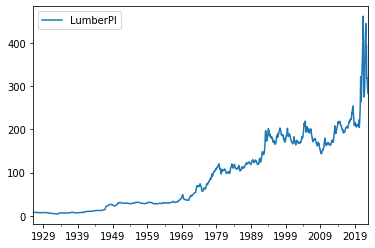

In [4]:
LumberPI.plot()

In [5]:

final = NewComp.merge(NewConst,left_index=True,right_index=True)
final = final.merge(NewPerm,left_index=True,right_index=True)
final = final.merge(NewStart,left_index=True,right_index=True)
final = final.merge(LumberPI,left_index=True,right_index=True)
final = final.merge(MonSup,left_index=True,right_index=True)
final = final.merge(ShipIDX,left_index=True,right_index=True)
final = final.merge(Nhnc,left_index=True,right_index=True)
final = final.merge(Nht,left_index=True,right_index=True)
final = final.drop_duplicates()

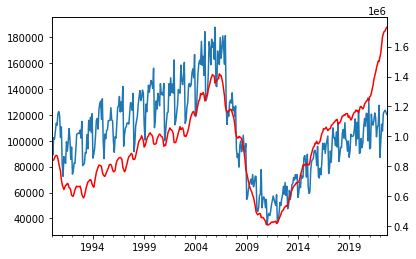

In [6]:
ax = final['NewComps'].plot()
ax2 = ax.twinx()
ax2 = final.NewConst.plot(c='red')

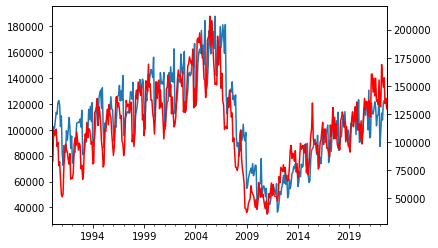

In [7]:
ax = final['NewComps'].plot()
ax2 = ax.twinx()
ax2 = final.NewPerms.plot(c='red')

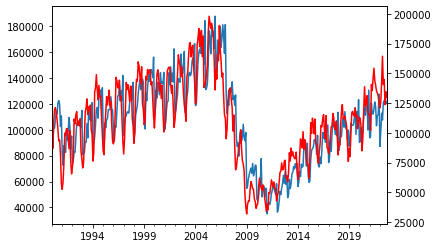

In [8]:
ax = final['NewComps'].plot()
ax2 = ax.twinx()
ax2 = final.NewStarts.plot(c='red')

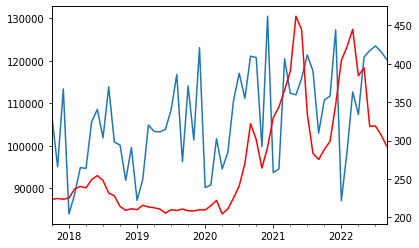

In [9]:
ax = final['NewComps'][-60:].plot()
ax2 = ax.twinx()
ax2 = final.LumberPI[-60:].plot(c='red')

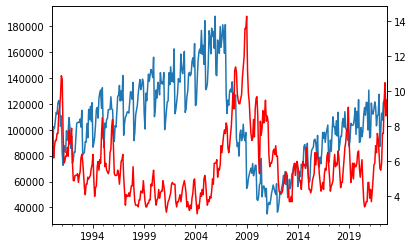

In [10]:
ax = final['NewComps'].plot()
ax2 = ax.twinx()
ax2 = final.MonSupply.plot(c='red')

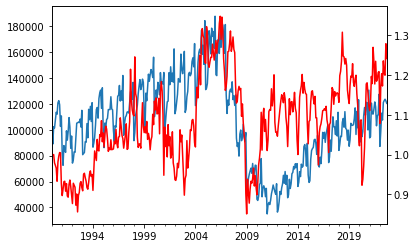

In [11]:
ax = final['NewComps'].plot()
ax2 = ax.twinx()
ax2 = final.ShipIDX.plot(c='red')

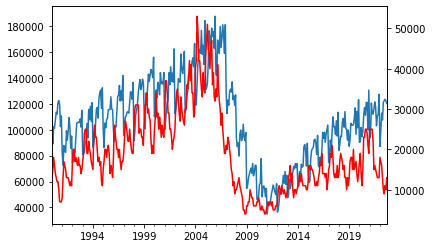

In [12]:
ax = final['NewComps'].plot()
ax2 = ax.twinx()
ax2 = final.Nhnc.plot(c='red')

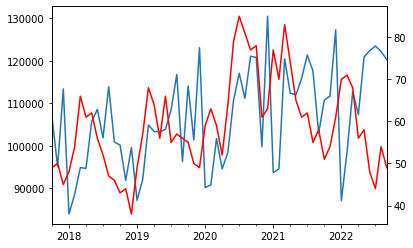

In [13]:
ax = final['NewComps'][-60:].plot()
ax2 = ax.twinx()
ax2 = final.Nht[-60:].plot(c='red')

In [14]:
final.describe()

,NewComps,NewConst,NewPerms,NewStarts,LumberPI,MonSupply,ShipIDX,Nhnc,Nht
count,393.000000,3.930000e+02,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,106208.905852,9.325896e+05,111989.312977,109970.737913,192.531038,5.796183,1.084532,18918.575064,58.389313
std,32035.087541,2.820523e+05,36701.421284,35765.244127,49.296287,1.935967,0.109290,9778.333296,21.957254
min,35000.000000,4.082000e+05,36300.000000,31900.000000,118.800000,3.000000,0.851000,4000.000000,20.000000
25%,86100.000000,7.109000e+05,88100.000000,84100.000000,169.200000,4.400000,1.011000,12000.000000,43.000000
50%,106100.000000,9.525000e+05,111600.000000,111600.000000,183.600000,5.300000,1.080000,17000.000000,56.000000
75%,127300.000000,1.135500e+06,136300.000000,136400.000000,204.600000,6.600000,1.160000,25000.000000,72.000000
max,187500.000000,1.729200e+06,211900.000000,197900.000000,462.000000,14.300000,1.347000,53000.000000,127.000000


C:\Users\matthewsomma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(-3.013612225060255,
 0.03364259635066255,
 14,
 377,
 {'1%': -3.4478152097574224,
  '5%': -2.8692371153451903,
  '10%': -2.5708704003405356},
 7825.0033341700855)

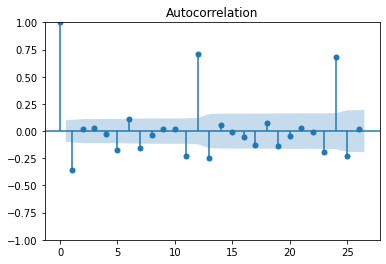

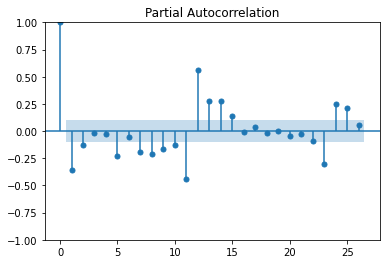

In [15]:
#fig1=plot_acf(final['NewComps'].dropna()) 
#fig2=plot_pacf(final['NewComps'].dropna())
#result = adfuller(final.NewComps.dropna())

final['NC_1Diff'] = final.NewComps - final.NewComps.shift(1)
fig1=plot_acf(final['NC_1Diff'].dropna()) 
fig2=plot_pacf(final['NC_1Diff'].dropna())
result = adfuller(final.NC_1Diff.dropna())
result

C:\Users\matthewsomma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(-2.9435123048076024,
 0.04051705492053672,
 16,
 375,
 {'1%': -3.447909006729481,
  '5%': -2.8692783343881483,
  '10%': -2.5708923751111112},
 8064.996051905777)

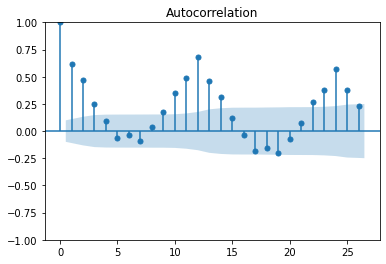

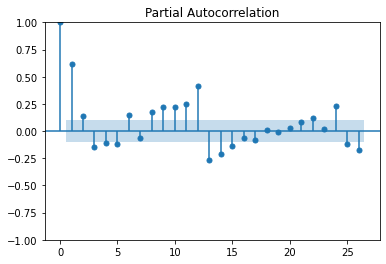

In [18]:
#fig1=plot_acf(final['NewConst'].dropna()) 
#fig2=plot_pacf(final['NewConst'].dropna())
#result = adfuller(final.NewConst.dropna())

final['NCon_1Diff'] = final.NewConst - final.NewConst.shift(1)
fig1=plot_acf(final['NCon_1Diff'].dropna()) 
fig2=plot_pacf(final['NCon_1Diff'].dropna())
result = adfuller(final.NCon_1Diff.dropna())

#final['NCon_2Diff'] = final.NCon_1Diff - final.NCon_1Diff.shift(1)
#fig1=plot_acf(final['NCon_2Diff'].dropna()) 
#fig2=plot_pacf(final['NCon_2Diff'].dropna())
#result = adfuller(final.NCon_2Diff.dropna())
result

C:\Users\matthewsomma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(-2.9435123048076024,
 0.04051705492053672,
 16,
 375,
 {'1%': -3.447909006729481,
  '5%': -2.8692783343881483,
  '10%': -2.5708923751111112},
 8064.996051905777)

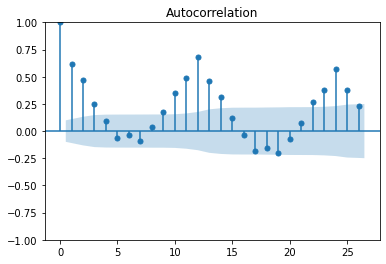

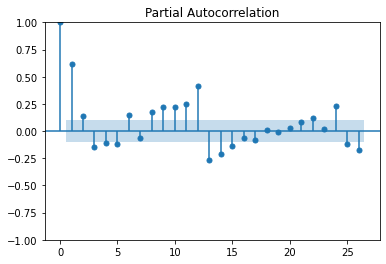

In [22]:
#fig1=plot_acf(final['NewPerms'].dropna()) 
#fig2=plot_pacf(final['NewPerms'].dropna())
#result = adfuller(final.NewPerms.dropna())

final['NP_1Diff'] = final.NewConst - final.NewConst.shift(1)
fig1=plot_acf(final['NP_1Diff'].dropna()) 
fig2=plot_pacf(final['NP_1Diff'].dropna())
result = adfuller(final.NP_1Diff.dropna())

#final['NP_2Diff'] = final.NP_1Diff - final.NP_1Diff.shift(1)
#fig1=plot_acf(final['NP_2Diff'].dropna()) 
#fig2=plot_pacf(final['NP_2Diff'].dropna())
#result = adfuller(final.NP_2Diff.dropna())
result

C:\Users\matthewsomma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(-3.3920736802548004,
 0.01123206539250827,
 16,
 375,
 {'1%': -3.447909006729481,
  '5%': -2.8692783343881483,
  '10%': -2.5708923751111112},
 7917.805477265801)

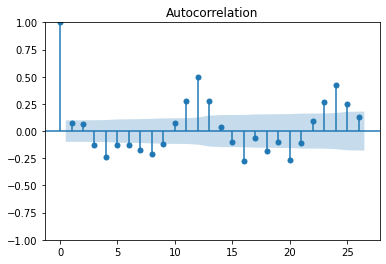

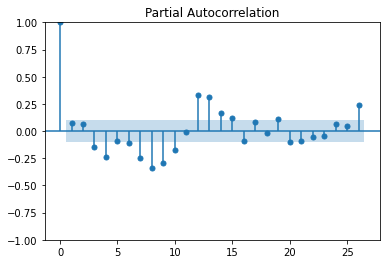

In [23]:
#fig1=plot_acf(final['NewStarts'].dropna()) 
#fig2=plot_pacf(final['NewStarts'].dropna())
#result = adfuller(final.NewStarts.dropna())

final['NS_1Diff'] = final.NewStarts - final.NewStarts.shift(1)
fig1=plot_acf(final['NS_1Diff'].dropna()) 
fig2=plot_pacf(final['NS_1Diff'].dropna())
result = adfuller(final.NS_1Diff.dropna())
result

C:\Users\matthewsomma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(-4.317027189521221,
 0.00041500097192183837,
 14,
 377,
 {'1%': -3.4478152097574224,
  '5%': -2.8692371153451903,
  '10%': -2.5708704003405356},
 693.7193705268635)

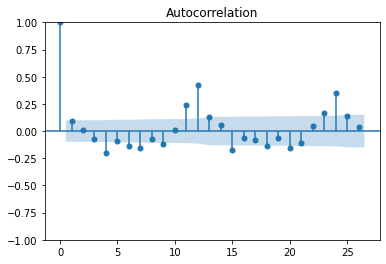

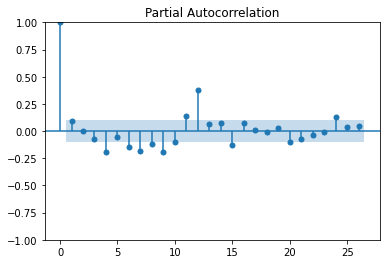

In [24]:
#fig1=plot_acf(final['MonSupply'].dropna()) 
#fig2=plot_pacf(final['MonSupply'].dropna())
#result = adfuller(final.MonSupply.dropna())
#result

final['MS_1Diff'] = final['MonSupply'] - final['MonSupply'].shift(1)
fig1=plot_acf(final['MS_1Diff'].dropna()) 
fig2=plot_pacf(final['MS_1Diff'].dropna())
result = adfuller(final.MS_1Diff.dropna())
result

C:\Users\matthewsomma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(-3.0786163251269194,
 0.028176684023995237,
 13,
 379,
 {'1%': -3.4477224095888497,
  '5%': -2.869196333125208,
  '10%': -2.5708486586002604},
 -1341.4513284582445)

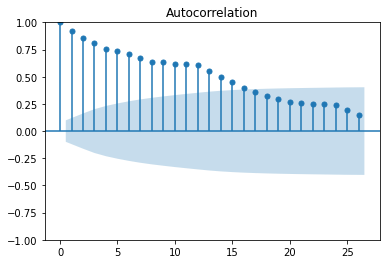

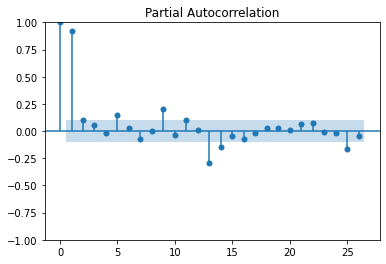

In [26]:
fig1=plot_acf(final['ShipIDX'].dropna()) 
fig2=plot_pacf(final['ShipIDX'].dropna())
result = adfuller(final.ShipIDX.dropna())

result

C:\Users\matthewsomma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(-2.985066656609092,
 0.0363127171453337,
 16,
 373,
 {'1%': -3.448003816652923,
  '5%': -2.86931999731073,
  '10%': -2.5709145866785503},
 2287.491940785301)

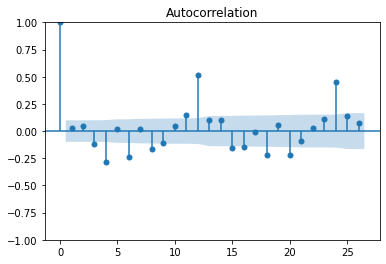

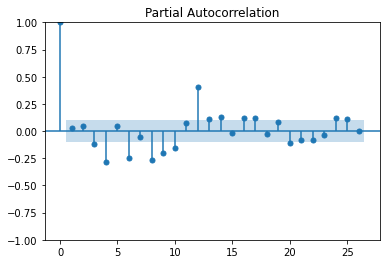

In [33]:
#fig1=plot_acf(final['Nhnc'].dropna()) 
#fig2=plot_pacf(final['Nhnc'].dropna())
#result = adfuller(final.Nhnc.dropna())

final['Nhnc_1Diff'] = final.Nht - final.Nht.shift(1)
fig1=plot_acf(final['Nhnc_1Diff'].dropna()) 
fig2=plot_pacf(final['Nhnc_1Diff'].dropna())
result = adfuller(final.Nhnc_1Diff.dropna())
result


C:\Users\matthewsomma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\matthewsomma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(-2.985066656609092,
 0.0363127171453337,
 16,
 373,
 {'1%': -3.448003816652923,
  '5%': -2.86931999731073,
  '10%': -2.5709145866785503},
 2287.491940785301)

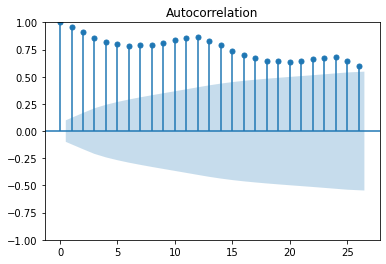

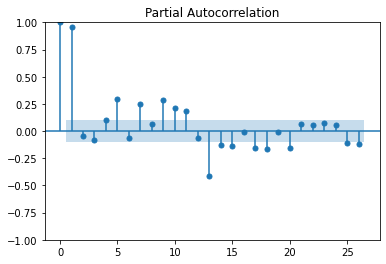

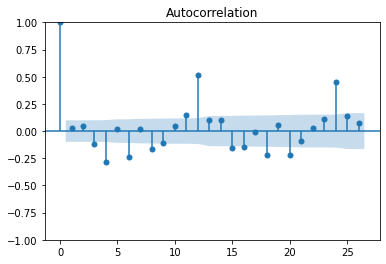

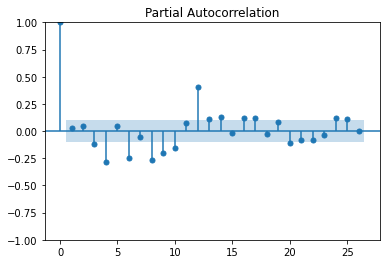

In [34]:
fig1=plot_acf(final['Nht'].dropna()) 
fig2=plot_pacf(final['Nht'].dropna())
result = adfuller(final.Nht.dropna())

final['Nht_1Diff'] = final.Nht - final.Nht.shift(1)
fig1=plot_acf(final['Nht_1Diff'].dropna()) 
fig2=plot_pacf(final['Nht_1Diff'].dropna())
result = adfuller(final.Nht_1Diff.dropna())
result

In [52]:
final = final.dropna()
train = final[:-43]
test = final[-43:]
train

,NewComps,NewConst,NewPerms,NewStarts,LumberPI,MonSupply,ShipIDX,Nhnc,Nht,NC_1Diff,NCon_1Diff,NCon_2Diff,NP_1Diff,NP_2Diff,NS_1Diff,MS_1Diff,Nht_1Diff,Nhnc_1Diff
1990-04-01,101300.0,856000.0,105800.0,119000.0,129.3,6.9,0.979,16000.0,52.0,-1000.0,14500.0,11700.0,14500.0,11700.0,10500.0,0.7,-6.0,-6.0
1990-05-01,107400.0,868600.0,107900.0,121100.0,128.0,7.2,0.973,14000.0,50.0,6100.0,12600.0,-1900.0,12600.0,-1900.0,2100.0,0.3,-2.0,-2.0
1990-06-01,113400.0,873300.0,111600.0,117800.0,125.9,7.2,0.966,13000.0,50.0,6000.0,4700.0,-7900.0,4700.0,-7900.0,-3300.0,0.0,0.0,0.0
1990-07-01,111900.0,870200.0,96200.0,111200.0,126.5,7.6,0.933,12000.0,46.0,-1500.0,-3100.0,-7800.0,-3100.0,-7800.0,-6600.0,0.4,-4.0,-4.0
1990-08-01,120700.0,849900.0,99800.0,102800.0,124.8,7.6,0.981,12000.0,46.0,8800.0,-20300.0,-17200.0,-20300.0,-17200.0,-8400.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-01,100200.0,1151900.0,113900.0,105700.0,214.2,7.8,1.224,10000.0,43.0,-700.0,1400.0,-7700.0,1400.0,-7700.0,-4000.0,0.7,-3.0,-3.0
2018-11-01,91900.0,1152000.0,102300.0,91200.0,209.2,7.7,1.162,13000.0,44.0,-8300.0,100.0,-1300.0,100.0,-1300.0,-14500.0,-0.1,1.0,1.0
2018-12-01,99600.0,1127500.0,96600.0,76000.0,211.2,9.1,1.142,11000.0,38.0,7700.0,-24500.0,-24600.0,-24500.0,-24600.0,-15200.0,1.4,-6.0,-6.0
2019-01-01,87200.0,1135900.0,96000.0,87000.0,210.0,7.1,1.128,13000.0,49.0,-12400.0,8400.0,32900.0,8400.0,32900.0,11000.0,-2.0,11.0,11.0


In [36]:
arr1 = np.array(train[['NCon_2Diff','NS_1Diff','NP_2Diff','Nht_1Diff','Nhnc_1Diff']]).reshape(-1,5)
arr2 = np.array(train['NC_1Diff']).reshape(-1,1)
stepwise_fit = auto_arima(arr2,arr1, start_p = 0, start_q = 0,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=6.76 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6738.631, Time=0.24 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6594.123, Time=1.39 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.41 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=8350.366, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=6695.614, Time=0.41 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6587.244, Time=4.22 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=16.39 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=6556.686, Time=6.67 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=6554.973, Time=4.25 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=6564.332, Time=5.46 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=14.76 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=6516.153, Time=2.42 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=6642.934, Time=0.82 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  347
Model:             SARIMAX(3, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -3237.457
Date:                              Mon, 21 Nov 2022   AIC                           6496.913
Time:                                      17:01:25   BIC                           6538.869
Sample:                                           0   HQIC                          6513.640
                                              - 347                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -37.1584     54.249     -0.685      0.493    -143.484      69.167
x1            -0.3627      0.010    -34.569      0.000      -0.383      -0.342
x2             0.8160      0.047     17.483      0.000       0.725       0.908
x3            -0.3627      0.010    -34.577      0.000      -0.383      -0.342
x4           -43.9445     29.957     -1.467      0.142    -102.660      14.771
x5           -43.9445     29.957     -1.467      0.142    -102.660      14.771
ar.L1         -0.6137      0.067     -9.201      0.000      -0.744      -0.483
ar.L2         -0.4692      0.074     -6.321      0.000      -0.615      -0.324
ar.L3         -0.2118      0.076     -2.796      0.005      -0.360      -0.063
ma.S.L12      -0.8836      0.068    -12.952      0.000      -1.017      -0.750
sigma2       2.08e+07      0.000   7.93e+10      0.000    2.08e+07    2.08e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               727.83
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.69
Prob(H) (two-sided):                  0.53   Kurtosis:                        10.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.96e+22. Standard errors may be unstable.
"""

In [37]:
model=sm.tsa.SARIMAX(train['NewComps'],train[['NewConst','NewStarts','NewPerms','Nht','Nhnc']],order=(3,0,0),seasonal_order=(0,1,1,12))
result=model.fit()
result.summary()

C:\Users\matthewsomma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\matthewsomma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             NewComps   No. Observations:                  347
Model:             SARIMAX(3, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -3438.604
Date:                              Mon, 21 Nov 2022   AIC                           6897.209
Time:                                      17:18:42   BIC                           6935.350
Sample:                                  04-01-1990   HQIC                          6912.414
                                       - 02-01-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
NewConst       0.0656      0.012      5.703      0.000       0.043       0.088
NewStarts      0.2087      0.084      2.489      0.013       0.044       0.373
NewPerms       0.0182      0.081      0.225      0.822      -0.141       0.177
Nht          347.5672    202.047      1.720      0.085     -48.438     743.572
Nhnc          -0.3754      0.355     -1.057      0.290      -1.071       0.320
ar.L1          0.3216      0.083      3.863      0.000       0.158       0.485
ar.L2          0.1937      0.081      2.402      0.016       0.036       0.352
ar.L3          0.1766      0.085      2.071      0.038       0.009       0.344
ma.S.L12      -0.6549      0.060    -10.978      0.000      -0.772      -0.538
sigma2      6.622e+07      0.001   9.97e+10      0.000    6.62e+07    6.62e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 2.91
Prob(Q):                              0.52   Prob(JB):                         0.23
Heteroskedasticity (H):               0.96   Skew:                             0.22
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.5e+27. Standard errors may be unstable.
"""

In [53]:
months = (datetime.datetime(2023,12,1).year -test.index.max().year) * 12 + (datetime.datetime(2023,12,1).month - test.index.max().month)
new_dates=[test.index[-1]+DateOffset(months=x) for x in range(1,months+1)]
test=pd.DataFrame(index=new_dates,columns=test.columns)
test.tail()

test_exog = test[['NewConst','NewStarts','NewPerms','Nht','Nhnc']]


,NewComps,NewConst,NewPerms,NewStarts,LumberPI,MonSupply,ShipIDX,Nhnc,Nht,NC_1Diff,NCon_1Diff,NCon_2Diff,NP_1Diff,NP_2Diff,NS_1Diff,MS_1Diff,Nht_1Diff,Nhnc_1Diff
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,lower NewComps,upper NewComps
2019-03-01,79968.398051,111866.650362
2019-04-01,78733.422551,112240.382809
2019-05-01,87437.245837,122258.586661
2019-06-01,94275.516915,130694.124995
2019-07-01,88247.174154,125347.063241
2019-08-01,98907.560393,136491.962739
2019-09-01,89574.230384,127515.131096
2019-10-01,92660.550492,130820.566476
2019-11-01,85731.295391,124040.747681
2019-12-01,99675.040183,138086.264601


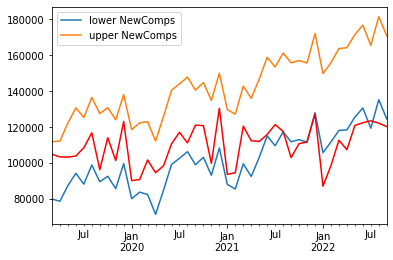

In [44]:
pred_uc = result.get_forecast(steps=len(test_exog),exog=test_exog)
pred_df = pred_uc.conf_int()
pred_df.plot()
test['NewComps'].plot(c='red')
pred_df